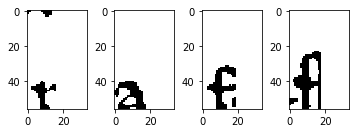

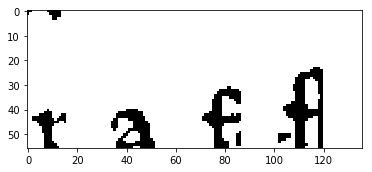

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
#import matplotlib.image as pltimg
from random import sample
import os
import numpy as np


dataset_folder = '/home/eris/Dropbox/original_samples/'

characters = os.listdir(dataset_folder)
characters.remove('.dropbox')

dataset_filenames = {char: [dataset_folder+char+'/'+f for f in os.listdir(dataset_folder+char)] for char in characters}

word = 'raff'
images = []

%matplotlib inline
plt.figure()
for i,c in enumerate(word):
    s = sample(dataset_filenames[c], 1)
    img = Image.open(s[0])
    images.append(img)
    plt.subplot(2, len(word), i + 1)
    plt.imshow(np.asarray(img), cmap='gray')
plt.show()

width, height = 34*len(word), 56

blank = Image.new('L', (width, height), color=255)

for i,image in enumerate(images):
    blank.paste(image, (34*i,0))

plt.imshow(np.asarray(blank), cmap='gray')
plt.show()
    


